## Step 1: Setup and Install Required Libraries

We will use the following Python libraries:
- **pandas** for data manipulation
- **seaborn** and **matplotlib** for visualization
- **scikit-learn** to load the Iris dataset

If these are not installed yet, run the installation command below.


In [1]:
!pip install pandas seaborn matplotlib scikit-learn


   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
   ------------ --------------------------- 3.4/10.7 MB 22.1 MB/s eta 0:00:01
   ----------------- ---------------------- 4.7/10.7 MB 13.1 MB/s eta 0:00:01
   -------------------- ------------------- 5.5/10.7 MB 9.6 MB/s eta 0:00:01
   ------------------------ --------------- 6.6/10.7 MB 8.0 MB/s eta 0:00:01
   -------------------------- ------------- 7.1/10.7 MB 6.7 MB/s eta 0:00:01
   --------------------------- ------------ 7.3/10.7 MB 6.3 MB/s eta 0:00:01
   ----------------------------- ---------- 7.9/10.7 MB 5.6 MB/s eta 0:00:01
   -------------------------------- ------- 8.7/10.7 MB 5.3 MB/s eta 0:00:01
   ----------------------------------- ---- 9.4/10.7 MB 5.0 MB/s eta 0:00:01
   -------------------------------------- - 10.2/10.7 MB 4.9 MB/s eta 0:00:01
   ---------------------------------------- 10.7/10.7 MB 4.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/41.0 MB ? eta -:--:--
   - ----


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Step 2: Import Libraries

After installation, import all the required libraries for analysis and visualization.


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris


## Step 3: Load the Iris Dataset

The Iris dataset is included in scikit-learn. It contains 150 samples of iris flowers with 4 features and 3 classes.

Let's load it using `load_iris()` function.


In [3]:
iris = load_iris()


## Step 4: Create a Pandas DataFrame

We convert the dataset to a pandas DataFrame for easier analysis.

- The features are stored in `iris.data`
- Feature names are in `iris.feature_names`
- Targets are in `iris.target`
- Target names (species) are in `iris.target_names`

We will add `target` and `species` columns to the DataFrame.


In [4]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['species'] = df['target'].apply(lambda x: iris.target_names[x])
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


## Step 5: Dataset Shape and Info

Let's see how many rows and columns the dataset has, the data types, and check for missing values.


In [5]:
print("Dataset shape:", df.shape)
print("\nDataset info:")
df.info()
print("\nMissing values in each column:")
print(df.isnull().sum())


Dataset shape: (150, 6)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
 5   species            150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB

Missing values in each column:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
species              0
dtype: int64


## Step 6: Statistical Summary

Get basic statistics (mean, std, min, max, quartiles) of numeric features to understand the data distribution.


In [6]:
df.describe()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## Step 7: Species Distribution

Let's check how many samples belong to each iris species.


In [7]:
df['species'].value_counts()


species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

## Step 8: Visualize Feature Distributions by Species

Use seaborn to plot histograms or boxplots to compare features across species.


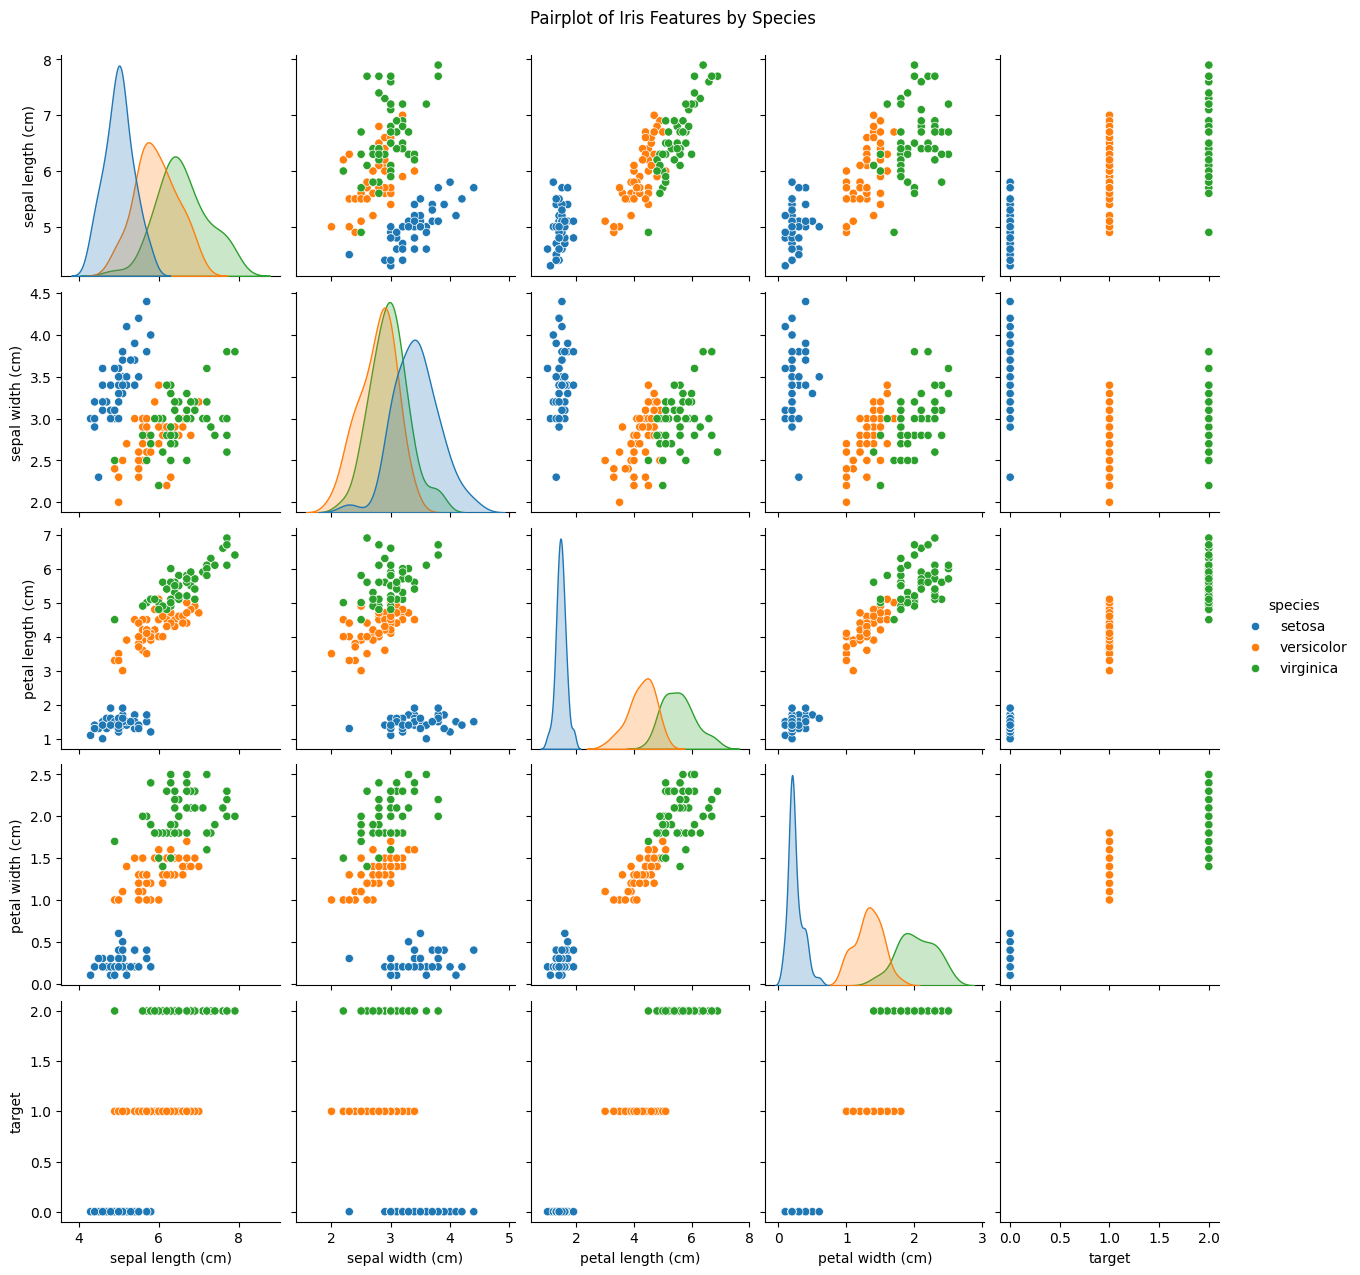

In [8]:
# Pairplot shows scatterplots for feature pairs and histograms on diagonals, colored by species
sns.pairplot(df, hue='species')
plt.suptitle("Pairplot of Iris Features by Species", y=1.02)
plt.show()


## Step 9: Correlation Heatmap

Check how features relate to each other by calculating correlation coefficients and visualize them using a heatmap.


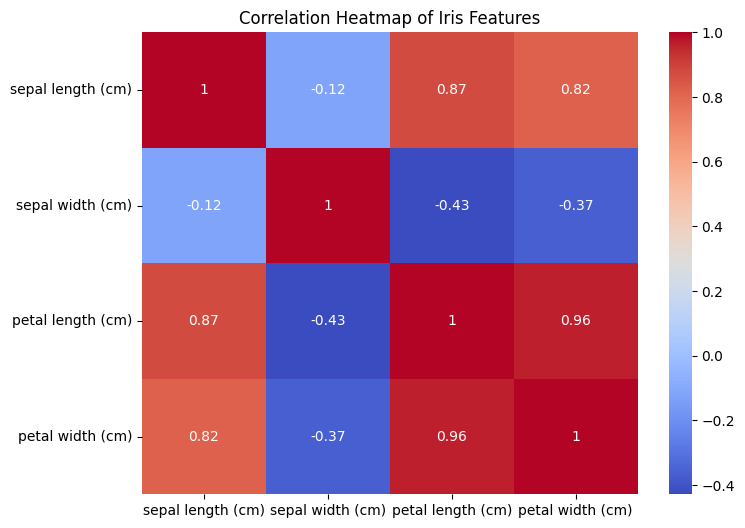

In [9]:
plt.figure(figsize=(8,6))
sns.heatmap(df.iloc[:, :-2].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Iris Features')
plt.show()


## Step 10: Boxplots of Features by Species

Boxplots help visualize the distribution, median, and outliers for each feature across different iris species.


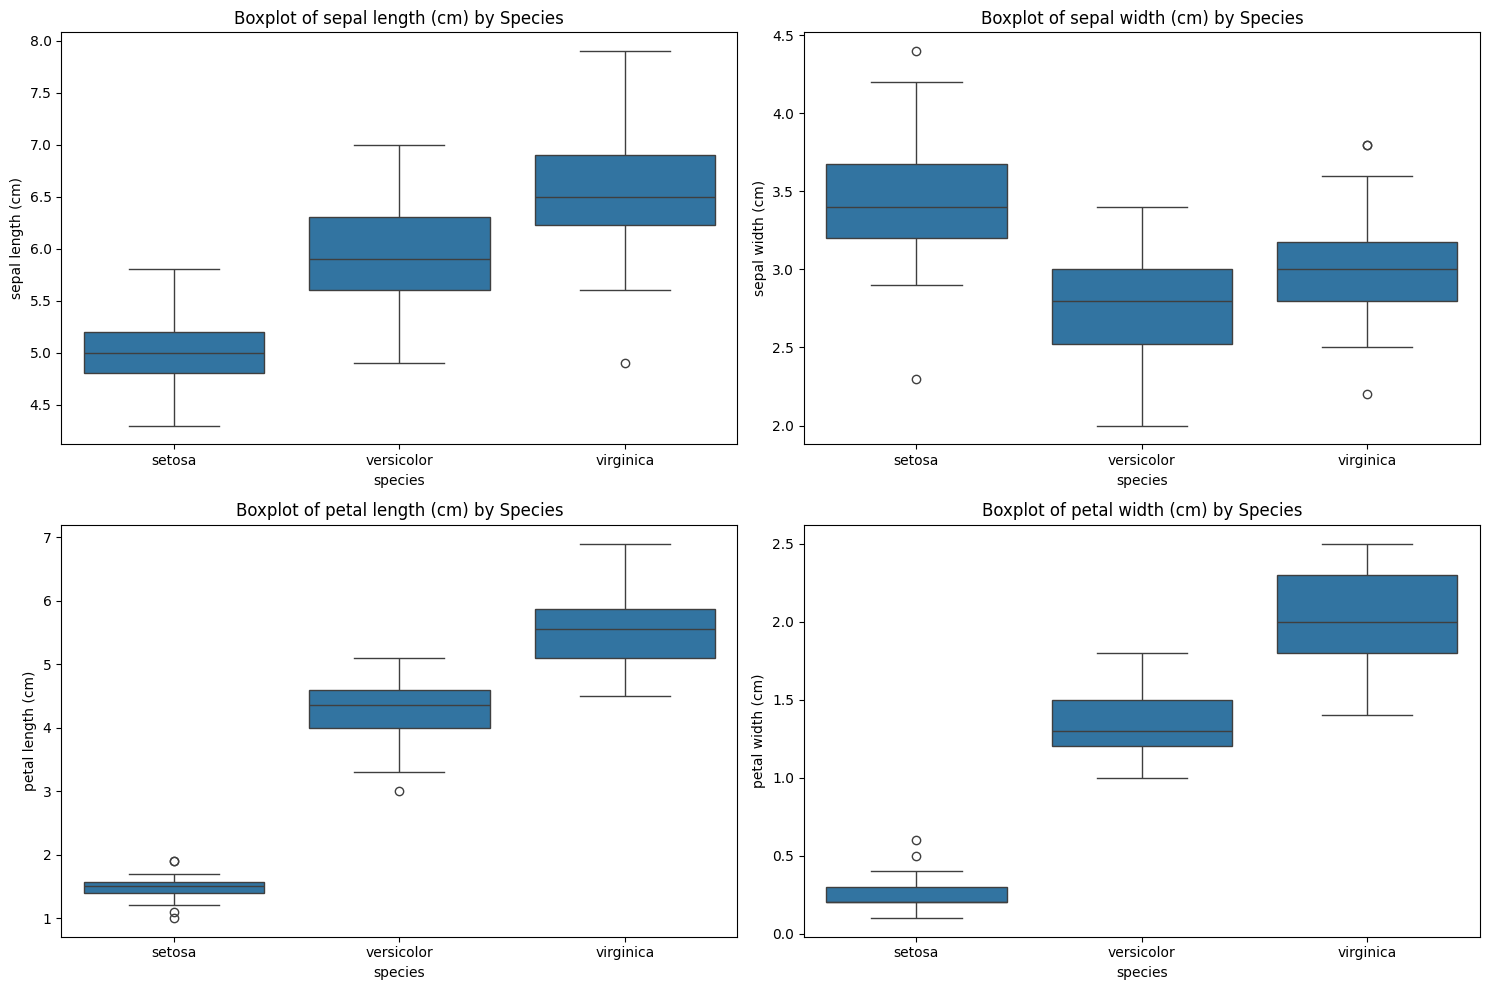

In [10]:
features = iris.feature_names
plt.figure(figsize=(15,10))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='species', y=feature, data=df)
    plt.title(f'Boxplot of {feature} by Species')

plt.tight_layout()
plt.show()


## Step 11: Summary and Next Steps

We have:
- Loaded and prepared the Iris dataset
- Explored basic statistics and class distribution
- Visualized relationships with pairplots, heatmaps, and boxplots




## Step 12: Import Libraries for Modeling

We’ll use scikit-learn for building and evaluating the classification model.


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


## Step 13: Prepare Features and Target

Separate the dataset into features (`X`) and target variable (`y`).


In [12]:
X = df.iloc[:, :-1]  # all columns except 'species'
y = df['species']


## Step 14: Split Data

Split data into training and testing sets (80% train, 20% test).


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Step 15: Scale Features

Standardize features for better model performance.


In [14]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## Step 16: Train Logistic Regression Model

Fit the model on training data.


In [15]:
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


## Step 17: Predict and Evaluate

Make predictions on the test set and evaluate model performance.


In [16]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


## Step 18: Summary

We built a Logistic Regression classifier to predict iris species and evaluated its performance. This adds a predictive modeling aspect to your project, which is great for showcasing practical data science skills.
